# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [70]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for data preparation and model building


# Setting global constants to ensure notebook results are reproducible


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [71]:
df = pd.read_csv('df_train.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [72]:
# ensuring all columns are displayed
pd.set_option('display.max_columns', 0)
# look at data statistics
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [73]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [74]:
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.000000,297.248333,296.056667,801.666667,299.620333,81.333333,294.820000,296.855000,296.816667,

In [75]:
df.describe(include='all')

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763,8763.000000,8763,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
unique,8763,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-01 03:00:00,NaN,level_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.425729,NaN,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,NaN,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,NaN,1.850371,NaN,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,NaN,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,NaN,0.000000,NaN,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,NaN,1.000000,NaN,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,NaN,2.000000,NaN,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.00

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [79]:
df['time'].dtype

dtype('O')

In [82]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Valencia_wind_deg     8763 non-null   object        
 3   Bilbao_rain_1h        8763 non-null   float64       
 4   Valencia_wind_speed   8763 non-null   float64       
 5   Seville_humidity      8763 non-null   float64       
 6   Madrid_humidity       8763 non-null   float64       
 7   Bilbao_clouds_all     8763 non-null   float64       
 8   Bilbao_wind_speed     8763 non-null   float64       
 9   Seville_clouds_all    8763 non-null   float64       
 10  Bilbao_wind_deg       8763 non-null   float64       
 11  Barcelona_wind_speed  8763 non-null   float64       
 12  Barcelona_wind_deg    8763 non-null   float64       
 13  Madrid_clouds_all 

In [84]:
df['Valencia_wind_deg'].head()

0     level_5
1    level_10
2     level_9
3     level_8
4     level_7
Name: Valencia_wind_deg, dtype: object

In [85]:
df.drop(df[['Barcelona_rain_1h', 'Madrid_weather_id',	'Barcelona_weather_id', 'Seville_weather_id', 'Bilbao_weather_id', 'Bilbao_temp_min']], axis=1, inplace=True)
col_names = df.columns
col_names_sorted = sorted(col_names)
col_names_sorted = ['time','Barcelona_pressure','Barcelona_rain_3h','Barcelona_temp','Barcelona_temp_max','Barcelona_temp_min','Barcelona_wind_deg','Barcelona_wind_speed','Bilbao_clouds_all','Bilbao_pressure','Bilbao_rain_1h','Bilbao_snow_3h','Bilbao_temp','Bilbao_temp_max', 'Bilbao_wind_deg','Bilbao_wind_speed','Madrid_clouds_all','Madrid_humidity','Madrid_pressure','Madrid_rain_1h','Madrid_temp','Madrid_temp_max','Madrid_temp_min','Madrid_wind_speed',
 'Seville_clouds_all',
 'Seville_humidity',
 'Seville_pressure',
 'Seville_rain_1h',
 'Seville_rain_3h',
 'Seville_temp',
 'Seville_temp_max',
 'Seville_temp_min',
 'Seville_wind_speed',
 'Valencia_humidity',
 'Valencia_pressure',
 'Valencia_snow_3h',
 'Valencia_temp',
 'Valencia_temp_max',
 'Valencia_temp_min',
 'Valencia_wind_deg',
 'Valencia_wind_speed',
 'load_shortfall_3h']
col_names_sorted

['time',
 'Barcelona_pressure',
 'Barcelona_rain_3h',
 'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Barcelona_wind_deg',
 'Barcelona_wind_speed',
 'Bilbao_clouds_all',
 'Bilbao_pressure',
 'Bilbao_rain_1h',
 'Bilbao_snow_3h',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_wind_deg',
 'Bilbao_wind_speed',
 'Madrid_clouds_all',
 'Madrid_humidity',
 'Madrid_pressure',
 'Madrid_rain_1h',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Madrid_wind_speed',
 'Seville_clouds_all',
 'Seville_humidity',
 'Seville_pressure',
 'Seville_rain_1h',
 'Seville_rain_3h',
 'Seville_temp',
 'Seville_temp_max',
 'Seville_temp_min',
 'Seville_wind_speed',
 'Valencia_humidity',
 'Valencia_pressure',
 'Valencia_snow_3h',
 'Valencia_temp',
 'Valencia_temp_max',
 'Valencia_temp_min',
 'Valencia_wind_deg',
 'Valencia_wind_speed',
 'load_shortfall_3h']

In [87]:
df = df.reindex(col_names_sorted, axis=1)
df.head()

,time,Barcelona_pressure,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h
0,2015-01-01 03:00:00,1036.333333,0.0,281.013000,281.013000,281.013000,42.666667,6.333333,0.0,1035.000000,0.0,0.0,269.338615,269.338615,223.333333,1.000000,0.0,64.000000,971.333333,0.0,265.938000,265.938000,265.938000,0.666667,0.0,74.333333,sp25,0.0,0.0,274.254667,274.254667,274.254667,3.333333,75.666667,1002.666667,0.0,269.888000,269.888000,269.888000,level_5,0.666667,6715.666667
1,2015-01-01 06:00:00,1037.333333,0.0,280.561667,280.561667,280.561667,139.000000,4.000000,0.0,1035.666667,0.0,0.0,270.376000,270.376000,221.000000,1.000000,0.0,64.666667,972.666667,0.0,266.386667,266.386667,266.386667,0.333333,0.0,78.333333,sp25,0.0,0.0,274.945000,274.945000,274.945000,3.333333,71.000000,1004.333333,0.0,271.728333,271.728333,271.728333,level_10,1.666667,4171.666667
2,2015-01-01 09:00:00,1038.000000,0.0,281.583667,281.583667,281.583667,326.000000,2.000000,0.0,1036.000000,0.0,0.0,275.027229,275.027229,214.333333,1.000000,0.0,64.333333,974.000000,0.0,272.708667,272.708667,272.708667,1.000000,0.0,71.333333,sp25,0.0,0.0,278.792000,278.792000,278.792000,2.666667,65.666667,1005.333333,0.0,278.008667,278.008667,278.008667,level_9,1.000000,4274.666667
3,2015-01-01 12:00:00,1037.000000,0.0,283.434104,283.434104,283.434104,273.000000,2.333333,0.0,1036.000000,0.0,0.0,281.135063,281.135063,199.666667,1.000000,0.0,56.333333,994.666667,0.0,281.895219,281.895219,281.895219,1.000000,0.0,65.333333,sp25,0.0,0.0,285.394000,285.394000,285.394000,4.000000,54.000000,1009.000000,0.0,284.899552,284.899552,284.899552,level_8,1.000000,5075.666667
4,2015-01-01 15:00:00,1035.000000,0.0,284.213167,284.213167,284.213167,260.000000,4.333333,2.0,1035.333333,0.0,0.0,282.252063,282.252063,185.000000,0.333333,0.0,57.000000,1035.333333,0.0,280.678437,280.678437,280.678437,1.000000,0.0,59.000000,sp25,0.0,0.0,285.513719,285.513719,285.513719,3.000000,58.333333,NaN,0.0,283.015115,283.015115,283.015115,level_7,1.000000,6620.666667


In [42]:
corr = df.corr()
corr

,Barcelona_pressure,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_wind_deg,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h
Barcelona_pressure,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.231747,-0.157088,0.050043,-0.136672,0.133468,0.128726,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Barcelona_temp,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.054814,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Barcelona_temp_max,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.096374,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Barcelona_temp_min,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.099458,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Barcelona_wind_deg,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.053074,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Barcelona_wind_speed,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,0.000377,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_clouds_all,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.122915,0.054035,0.103342,0.075541,0.091352,0.093919,0.080357,-0.279825,0.093177,0.011151,0.025367,0.018967,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Bilbao_pressure,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,-0.031373,0.552414,0.144119,0.408001,0.001718,0.020264,0.087240,0.295499,0.029194,-0.009782,-0.330575,-0.214600,-0.181783,-0.219365,-0.188804,-0.186982,-0.208859,0.097491,-0.179211,-0.205060,-0.238895,-0.186463,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_rain_1h,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,-0.015481,0.085040,0.120378,0.030082,-0.041314,0.034220,0.006888,0.057058,0.007202,-0.022680,-0.107361,-0.124372,-0.076038,-0.166636,0.0

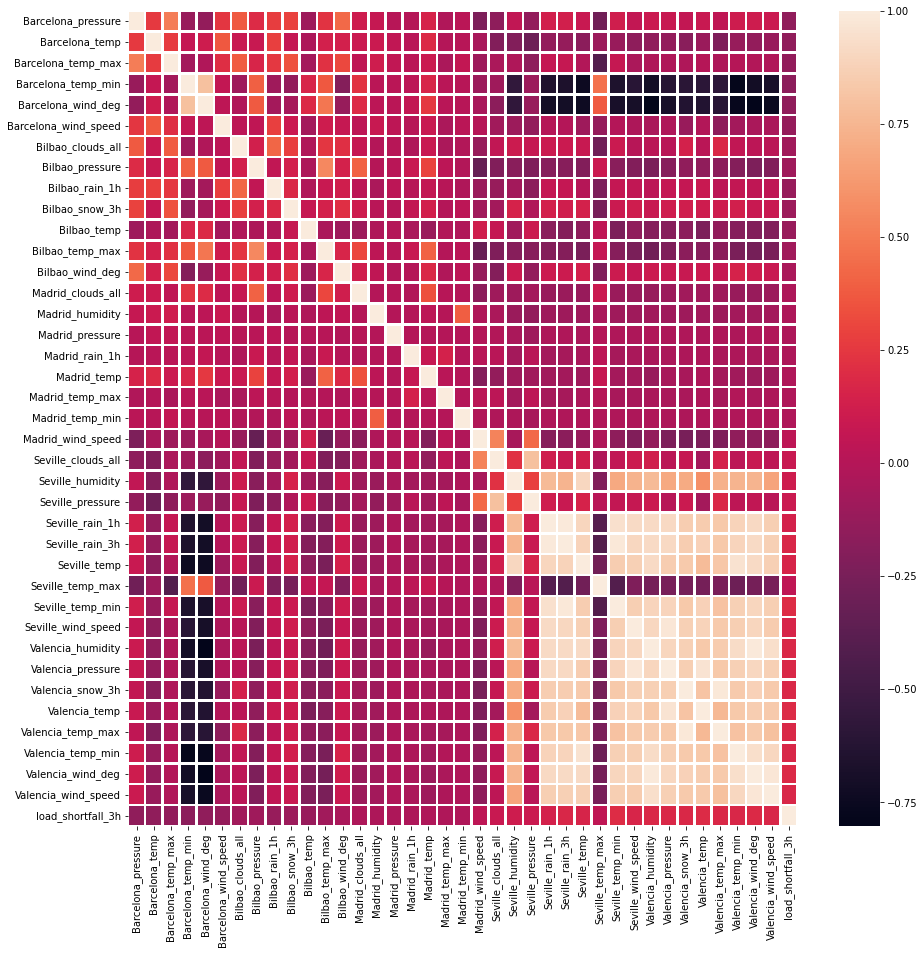

In [43]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1.5, ax=ax)

In [44]:
pos_corr = df.corr()[df.corr() > 0.1]['load_shortfall_3h'].dropna()
df_pos_corr = pd.DataFrame(pos_corr)
df_pos_corr

,load_shortfall_3h
Seville_humidity,0.109834
Seville_rain_1h,0.144270
Seville_rain_3h,0.173225
Seville_temp,0.159343
Seville_temp_min,0.201863
Seville_wind_speed,0.164734
Valencia_humidity,0.182548
Valencia_pressure,0.182673
Valencia_snow_3h,0.176411
Valencia_temp,0.195984


In [45]:
neg_corr = df.corr()[df.corr() < -0.1]['load_shortfall_3h'].dropna()
df_neg_corr = pd.DataFrame(neg_corr)
df_neg_corr

,load_shortfall_3h
Barcelona_pressure,-0.150981
Barcelona_temp,-0.152510
Barcelona_temp_max,-0.142791
Barcelona_temp_min,-0.167290
Barcelona_wind_deg,-0.150536
Barcelona_wind_speed,-0.127293
Bilbao_rain_1h,-0.120800
Bilbao_snow_3h,-0.103633
Bilbao_temp,-0.116133


In [46]:
df_corr = pd.concat([df_neg_corr, df_pos_corr], axis=0)
df_corr

,load_shortfall_3h
Barcelona_pressure,-0.150981
Barcelona_temp,-0.152510
Barcelona_temp_max,-0.142791
Barcelona_temp_min,-0.167290
Barcelona_wind_deg,-0.150536
Barcelona_wind_speed,-0.127293
Bilbao_rain_1h,-0.120800
Bilbao_snow_3h,-0.103633
Bilbao_temp,-0.116133
Seville_humidity,0.109834


In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [48]:
formula_str = df.columns[-1]+' ~ '+'+'.join(df_corr.T.columns[:-1]); formula_str

'load_shortfall_3h ~ Barcelona_pressure+Barcelona_temp+Barcelona_temp_max+Barcelona_temp_min+Barcelona_wind_deg+Barcelona_wind_speed+Bilbao_rain_1h+Bilbao_snow_3h+Bilbao_temp+Seville_humidity+Seville_rain_1h+Seville_rain_3h+Seville_temp+Seville_temp_min+Seville_wind_speed+Valencia_humidity+Valencia_pressure+Valencia_snow_3h+Valencia_temp+Valencia_temp_max+Valencia_temp_min+Valencia_wind_deg+Valencia_wind_speed'

In [49]:
model = smf.ols(formula=formula_str, data=df)

In [50]:
fitted = model.fit()

In [51]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     60.07
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          3.56e-257
Time:                        14:42:00   Log-Likelihood:                -86801.
No. Observations:                8763   AIC:                         1.736e+05
Df Residuals:                    8739   BIC:                         1.738e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.957e+04 

In [52]:
# plot relevant feature interactions

In [53]:
# evaluate correlation

In [54]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [55]:
# remove missing values/ features

In [56]:
# create new features

In [57]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [58]:
# split data

In [59]:
# create targets and features dataset

In [60]:
# create one or more ML models

In [61]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [62]:
# Compare model performance

In [63]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [64]:
# discuss chosen methods logic